In [9]:
import pandas as pd
import circlify
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns
import geopandas as gpd
import numpy as np
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image
# 設定字體
fm.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
sns.set(font=['Taipei Sans TC Beta'])

##### 行政區商圈數量

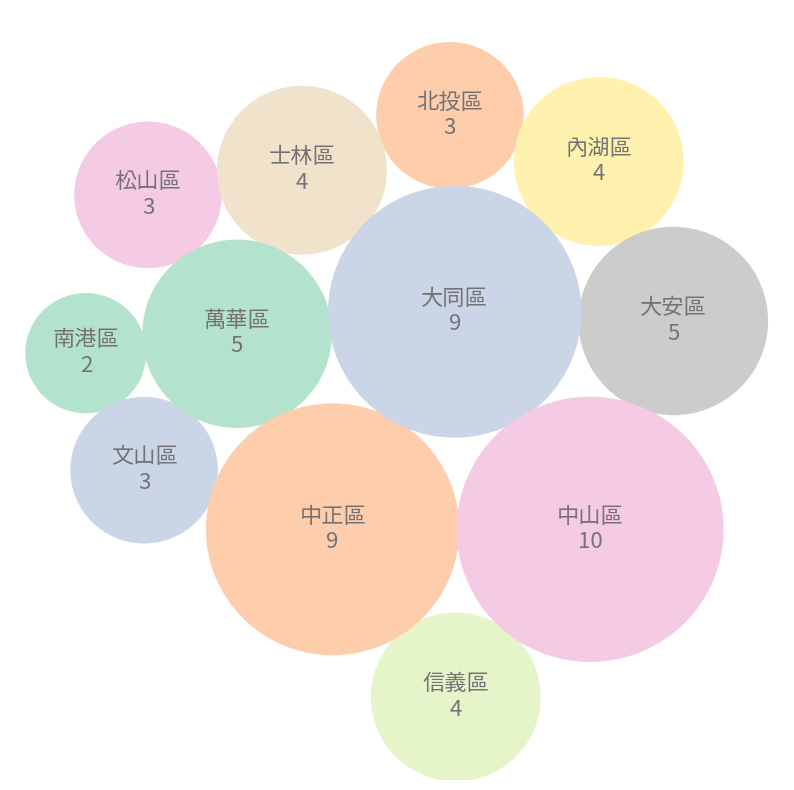

In [8]:
file_path = 'data/北市_商圈綠地.csv'
data = pd.read_csv(file_path)

# Group and count data
grouped_data = data.groupby(['區', 'type']).size().reset_index(name='counts')

# Separate and sort the dataframes for '商圈' and '公園'
business_districts_data = grouped_data[grouped_data['type'] == '商圈'].sort_values(by='counts', ascending=True)

business_values = business_districts_data['counts'].tolist()
business_labels = business_districts_data['區'].tolist()
business_circles = circlify.circlify(business_values, show_enclosure=False)

fig, ax = plt.subplots(figsize=(10,10))
ax.axis('off')

# Find axis boundaries
lim = max(max(abs(circle.x) + circle.r, abs(circle.y) + circle.r) for circle in business_circles)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

palette = sns.color_palette("Pastel2", len(business_labels))
sns.set_palette(palette)

colors = palette.as_hex()

# Print circles and add labels with counts
for circle, label, color, value in zip(business_circles, business_labels, colors, business_values):
    x, y, r = circle.x, circle.y, circle.r
    ax.add_patch(plt.Circle((x, y), r, linewidth=2, color=color))
    ax.annotate(f"{label}\n{value}", (x, y), va='center', ha='center', color='#747274', fontsize = 16, fontweight='bold')

plt.show()





C:\Users\flora\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:48: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


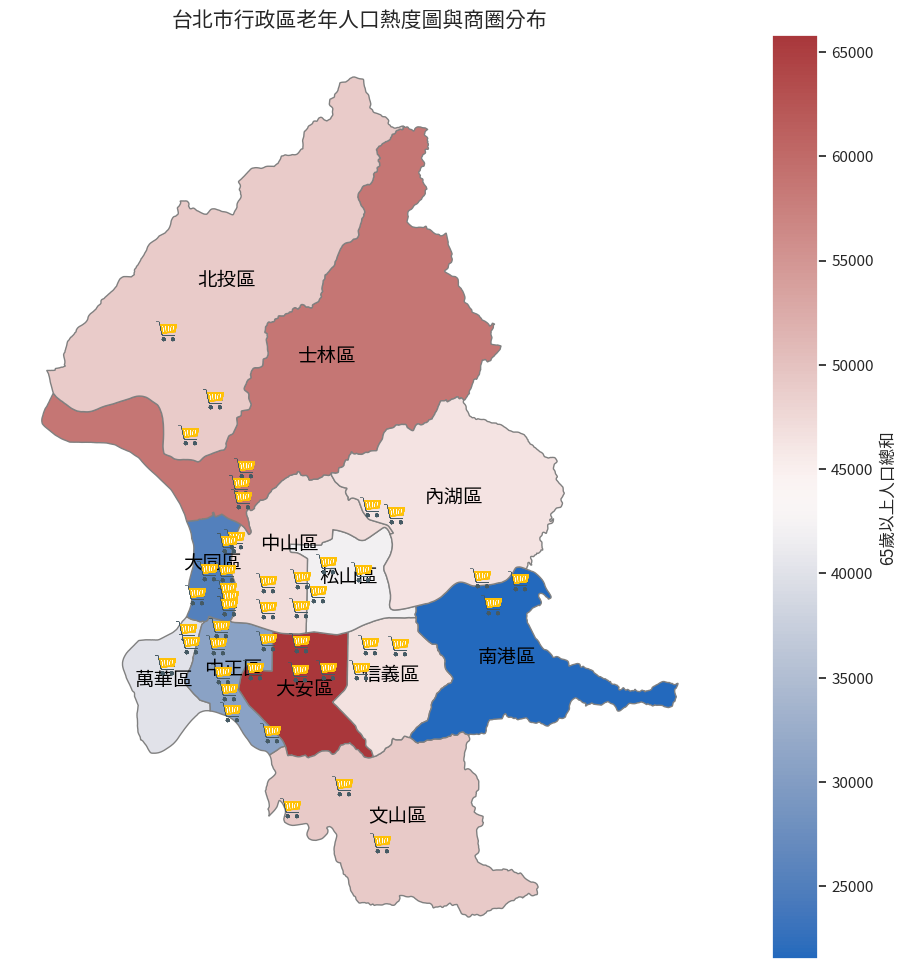

In [30]:
def plot_icon(ax, x, y, img, zoom=0.01):
    im_offset = OffsetImage(img, zoom=zoom)
    im_ab = AnnotationBbox(im_offset, (x, y), frameon=False, pad=0)
    ax.add_artist(im_ab)

elderly_population_data = pd.read_csv('data/台北_行政區老年人口.csv')
elderly_population_data_renamed = elderly_population_data.rename(columns={'區域別': 'TOWNNAME'})

taipei_map = gpd.read_file('shapefiles/TOWN_MOI_1120825.shp')
taipei_districts = taipei_map[taipei_map['COUNTYNAME'] == '臺北市']

merged_data = taipei_districts.merge(elderly_population_data_renamed, on='TOWNNAME')

# Load the park locations
parks_data = pd.read_csv('data/北市_商圈綠地.csv')
parks_data = parks_data[parks_data['type'] == '商圈']

# Convert the parks data to a GeoDataFrame
gdf_parks = gpd.GeoDataFrame(
    parks_data, 
    geometry=gpd.points_from_xy(parks_data['Pm Lon'], parks_data['Pm Lat'])
)

# Creating the heatmap with elderly population
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
base = merged_data.plot(column='65歲以上總和', ax=ax, legend=True, cmap='vlag',
                        legend_kwds={'label': "65歲以上人口總和"},
                        edgecolor='grey')


# Adding titles and labels
ax.set_title('台北市行政區老年人口熱度圖與商圈分布', fontdict={'fontsize': 15})
ax.set_axis_off()

# Load the tree icon
icon_path = 'icons/shop.png'
icon_img_pil = Image.open(icon_path)
icon_img_pil_resized = icon_img_pil.resize((150, 150))  # 調整這裡的尺寸參數
# 將 PIL 圖像轉換為 NumPy 數組
icon_img = np.array(icon_img_pil_resized)

# Plot each tree icon on the map
for idx, row in gdf_parks.iterrows():
    plot_icon(base, row.geometry.x, row.geometry.y, icon_img, zoom=0.1)
    # 在地圖上標記行政區名稱
for idx, row in merged_data.iterrows():
    plt.annotate(s=row['TOWNNAME'], xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                 horizontalalignment='center', fontsize=14, color='black')

plt.show()


##### 行政區公園綠地數量

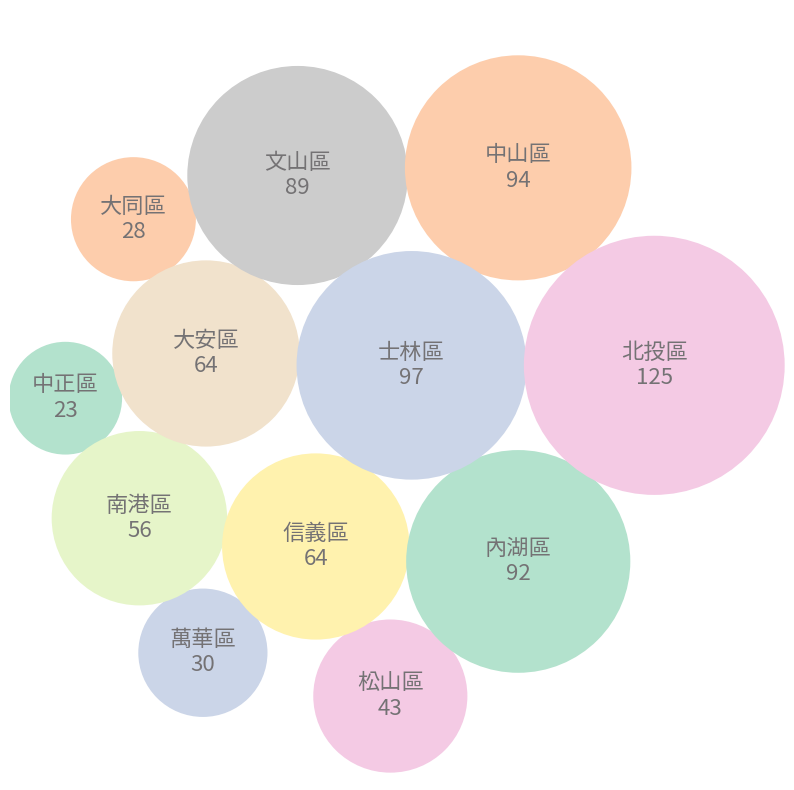

In [7]:
# Separate and sort the dataframes for '商圈' and '公園'
park_data = grouped_data[grouped_data['type'] == '公園'].sort_values(by='counts', ascending=True)

park_values = park_data['counts'].tolist()
park_labels = park_data['區'].tolist()

park_circles = circlify.circlify(park_values, show_enclosure=False)

fig, ax = plt.subplots(figsize=(10,10))
ax.axis('off')

# Find axis boundaries
lim = max(max(abs(circle.x) + circle.r, abs(circle.y) + circle.r) for circle in park_circles)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

palette = sns.color_palette("Pastel2", len(park_labels))
sns.set_palette(palette)

colors = palette.as_hex()

# Print circles and add labels with counts
for circle, label, color, value in zip(park_circles, park_labels, colors, park_values):
    x, y, r = circle.x, circle.y, circle.r
    ax.add_patch(plt.Circle((x, y), r, linewidth=2, color=color))
    ax.annotate(f"{label}\n{value}", (x, y), va='center', ha='center', color='#747274', fontsize = 16, fontweight='bold')

plt.show()

C:\Users\flora\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:48: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


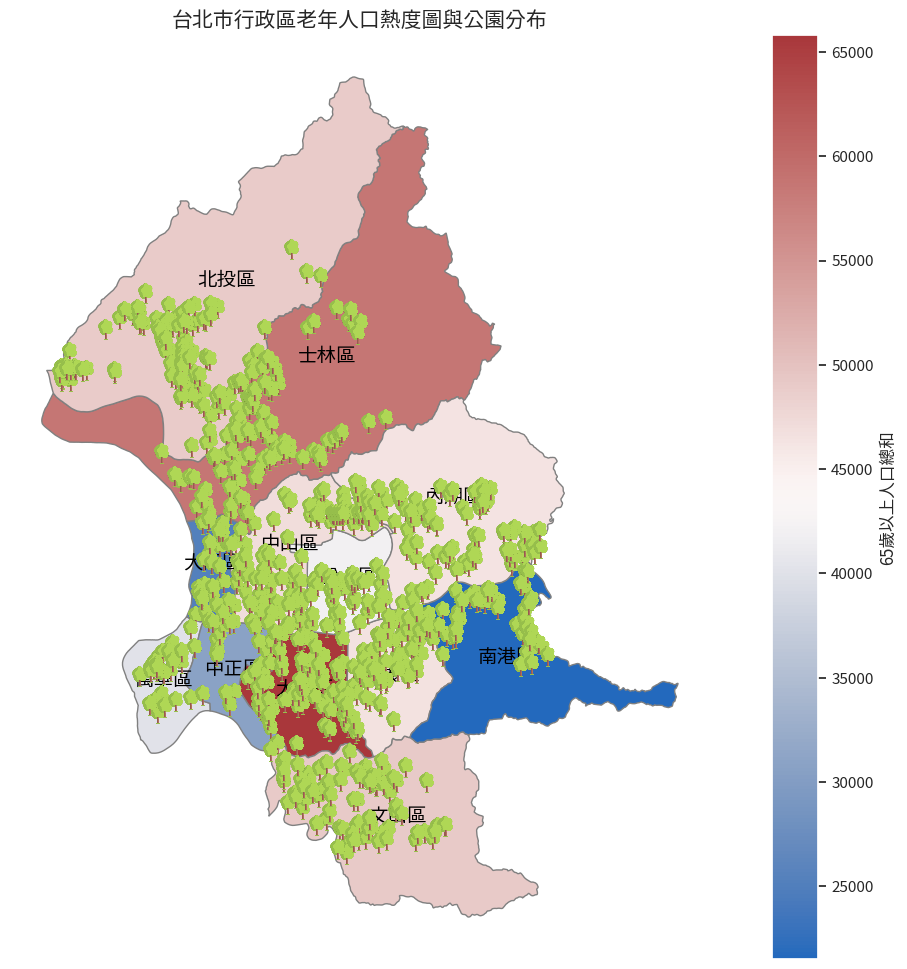

In [21]:
def plot_icon(ax, x, y, img, zoom=0.01):
    im_offset = OffsetImage(img, zoom=zoom)
    im_ab = AnnotationBbox(im_offset, (x, y), frameon=False, pad=0)
    ax.add_artist(im_ab)

elderly_population_data = pd.read_csv('data/台北_行政區老年人口.csv')
elderly_population_data_renamed = elderly_population_data.rename(columns={'區域別': 'TOWNNAME'})

taipei_map = gpd.read_file('shapefiles/TOWN_MOI_1120825.shp')
taipei_districts = taipei_map[taipei_map['COUNTYNAME'] == '臺北市']

merged_data = taipei_districts.merge(elderly_population_data_renamed, on='TOWNNAME')

# Load the park locations
parks_data = pd.read_csv('data/北市_商圈綠地.csv')
parks_data = parks_data[parks_data['type'] == '公園']

# Convert the parks data to a GeoDataFrame
gdf_parks = gpd.GeoDataFrame(
    parks_data, 
    geometry=gpd.points_from_xy(parks_data['Pm Lon'], parks_data['Pm Lat'])
)

# Creating the heatmap with elderly population
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
base = merged_data.plot(column='65歲以上總和', ax=ax, legend=True, cmap='vlag',
                        legend_kwds={'label': "65歲以上人口總和"},
                        edgecolor='grey')


# Adding titles and labels
ax.set_title('台北市行政區老年人口熱度圖與公園分布', fontdict={'fontsize': 15})
ax.set_axis_off()

# Load the tree icon
icon_path = 'icons/tree.png'
icon_img_pil = Image.open(icon_path)
icon_img_pil_resized = icon_img_pil.resize((150, 150))  # 調整這裡的尺寸參數
# 將 PIL 圖像轉換為 NumPy 數組
icon_img = np.array(icon_img_pil_resized)

# Plot each tree icon on the map
for idx, row in gdf_parks.iterrows():
    plot_icon(base, row.geometry.x, row.geometry.y, icon_img, zoom=0.1)
    # 在地圖上標記行政區名稱
for idx, row in merged_data.iterrows():
    plt.annotate(s=row['TOWNNAME'], xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                 horizontalalignment='center', fontsize=14, color='black')

plt.show()


##### 行政區綜合居住環境

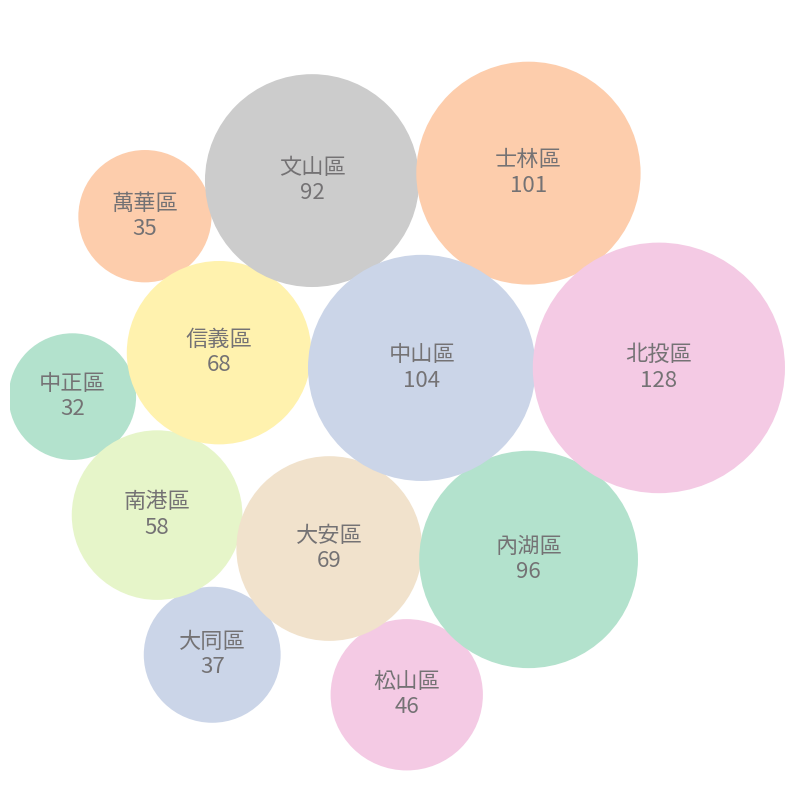

In [6]:
grouped_data = data.groupby(['區', 'type']).size().reset_index(name='counts')
summed_data = grouped_data.groupby('區')['counts'].sum().reset_index()

sorted_summed_data = summed_data.sort_values(by='counts', ascending=True)
summed_values = sorted_summed_data['counts'].tolist()
summed_labels = sorted_summed_data['區'].tolist()

summed_circles = circlify.circlify(summed_values, show_enclosure=False)


fig, ax = plt.subplots(figsize=(10,10))
ax.axis('off')

# Find axis boundaries
lim = max(max(abs(circle.x) + circle.r, abs(circle.y) + circle.r) for circle in summed_circles)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

palette = sns.color_palette("Pastel2", len(summed_labels))
sns.set_palette(palette)

colors = palette.as_hex()

# Print circles and add labels with counts
for circle, label, color, value in zip(summed_circles, summed_labels, colors, summed_values):
    x, y, r = circle.x, circle.y, circle.r
    ax.add_patch(plt.Circle((x, y), r, linewidth=2, color=color))
    ax.annotate(f"{label}\n{value}", (x, y), va='center', ha='center', color='#747274', fontsize = 16, fontweight='bold')

plt.show()
